# Introduction

##### - This notebook explores all the features in determining insurance cost of a person.
##### - The dataset consists of all the features that help in predicting insurance cost of a person.
##### - Let's start with our EDA!

## Import Libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

#Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

#Subplots
from plotly.subplots import make_subplots

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Import Dataset

In [120]:
path = 'insurance.csv'
df = pd.read_csv(path)

## Dataset Info

In [121]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [122]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [123]:
df.shape

(1338, 7)

* Our dataset consists of **1338** **rows** and **7** **columns**
* We can see that the number of columns is small
* Here is a description of the columns from the Data card:
<ol>
  <li>age: age of primary beneficiary</li>
  <li>sex: insurance contractor gender, female, male</li> 
  <li>bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9</li>
  <li>children: Number of children covered by health insurance / Number of dependents</li>
  <li>smoker: Smoking</li>
  <li>region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.</li>
  <li>charges: Individual medical costs billed by health insurance</li>
</ol>

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* Our data has a mix of datatypes: integers, floats and objects.
* Also there is no missing data.

In [125]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### statistical information

Understanding the distribution of the data: The mean, min, max, and other metrics provide a quick overview of the distribution of the data.

Outlier detection: The min, 25%, 75%, and max values can help identify outliers in the data.

Data normalization: The mean and std values can be used to normalize the data.

Feature scaling: The min, max, and other values can be used to scale the features to a suitable range.


In [126]:
#Description of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* bmi has a high mean and 25% with respect to ideal bmi, it seems there is a lot of overweight and obese people.
* Also charges max value seems an outlier.

In [127]:
#Let's look at the skewness of integers and floats features of our dataset
df_nums = df[['age', 'bmi', 'children', 'charges']]
df_nums.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

* Skewness tells us about the symmetry in a distribution.
* If Skewness is equal to zero , It is a symmetrical distribution.
* And If Skewness is less than or more than zero then it is a non-symmetrical distribution.
* If value is less than zero , distribution is left skewed and value is more than zero , distribution is right skewed.
* In our above data, there is no highly positively right skewed nor highly negatively left skewed features.

In [128]:
# Is there any duplication?
df.duplicated().sum()

1

In [129]:
# We simply drop it
df = df.drop_duplicates()

In [130]:
df.duplicated().sum()

0

let's take a look at categorical features

In [131]:
df_cat = df[[ 'sex', 'smoker', 'region']]

In [132]:
df_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [133]:
for feature in df_cat.columns:
    print(f'{feature}: {df_cat[feature].nunique()}')

sex: 2
smoker: 2
region: 4


In [134]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Target Feature

#### charges

In [135]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [136]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=df['charges']),row=1,col=1)
fig.add_trace(go.Box(y=df['charges'],boxpoints='all',line_color='red'),row=1,col=2)

fig.update_layout(height=500, showlegend=False, title_text="Charges Distribution and Box Plot")

* Charges has a right skewed distribution.
* The median Charges of our dataset is 9,836 which is less than the average value i.e because of right skewed distribution.

#### Now let's ask some questions to explore the dataset
* What's the impact of number of childern to the charges?
* Does age increasing means more charges?
* What's the impact of bmi to the charges?
* What's the region with highest average charges?
* Does Smoking have a positive relationship with charges?
* What is the average charges for males and females?

#### First Question: What's the impact of number of childern to the charges?

In [137]:
df['children'].nunique()

6

* We can analyze no. children as categorical feature

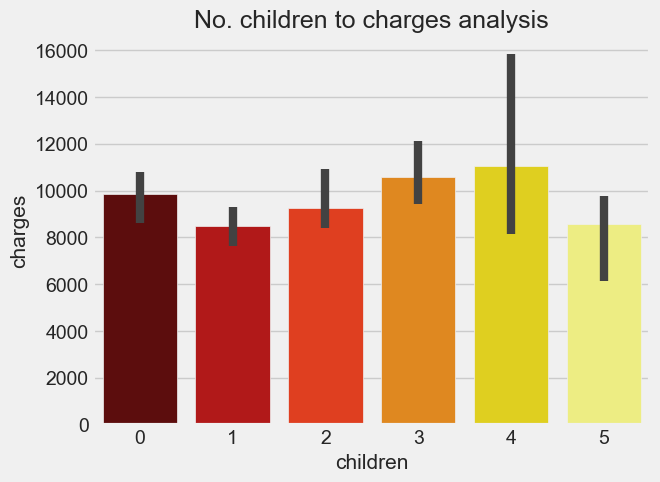

In [138]:
from numpy import median
sns.barplot(data=df,x="children",y="charges",estimator=median,palette='hot')
plt.xlabel("children",fontsize=15)
plt.ylabel("charges",fontsize=15)
plt.title("No. children to charges analysis",fontsize=18);

* From 1 to 4 children as the number of children increases charges mean increases, but there is a decrease in price for 5 children, and for zero children is the third highest after 4 and 3.
* Overall it's a good feature to predict charges.

#### Second Question: Does age increasing means more charges?

In [139]:
df['age'].nunique()

47

In [140]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(y=df['charges'],x=df['age'],name='age', mode='markers'), row=1, col=1)
fig.update_layout(height=500, showlegend=True,title_text="Age to charges analysis")

* It's obvious that there is low positive correlation between age and charges, as for every age we have high and low charges

#### Third Question: What's the impact of bmi to the charges?

In [141]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(y=df['charges'],x=df['bmi'],name='age', mode='markers'), row=1, col=1)
fig.update_layout(height=500, showlegend=True,title_text="bmi to charges analysis")

* For bmi the scatter plot shows that if your bmi is high your charges more likely will be high, but also it's low positive correlation.

Heatmap
* lets make a heatmap for out numerical features.
* We'll have a look at the correlation between all the numerical features with the help of Heatmap.
* Heatmap will tell us which features are positively ,negatively and have no correlation with our target feature that we are trying to predict here .i.e charges.

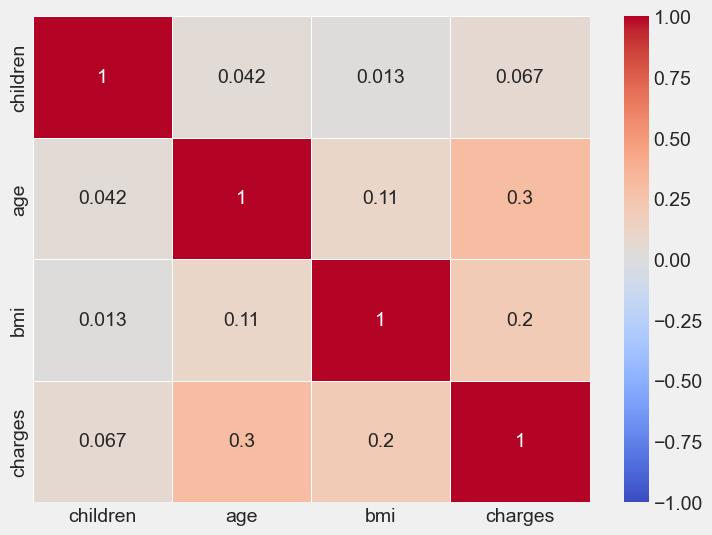

In [142]:
num = ['children', 'age', 'bmi']
df_corr = df[num]
df_corr['charges'] = df['charges']
corr = df_corr.corr()

fig = plt.figure(figsize=(8,6))

#Here we use cmap CoolWarm as it gives us a better view of postive and negative correlation.
#And with the help of vmin and vmax set to -1 and +1 , the features having values closer to +1 have positive correlation and features having values closer to -1 have negative correlation.
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

* As i said, there is low positive correlation between all numerical features and charges.
* Age is the highest and children is the lowest.

#### Fourth Question: What's the region with highest average charges?

In [143]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [144]:
region_group = df.groupby(["region"])["charges"].mean().sort_values(ascending=False)
region_group

region
southeast    14735.411438
northeast    13406.384516
northwest    12450.840844
southwest    12346.937377
Name: charges, dtype: float64

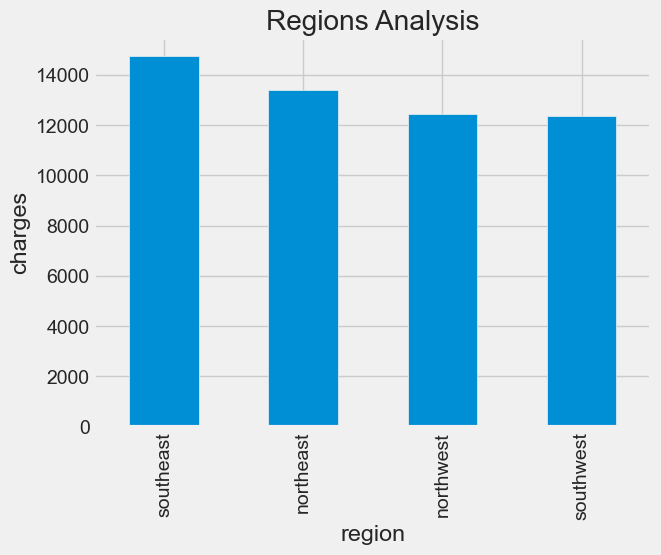

In [145]:
# Ploting
region_group.plot(kind="bar")
plt.ylabel("charges")
plt.title("Regions Analysis")
plt.show()

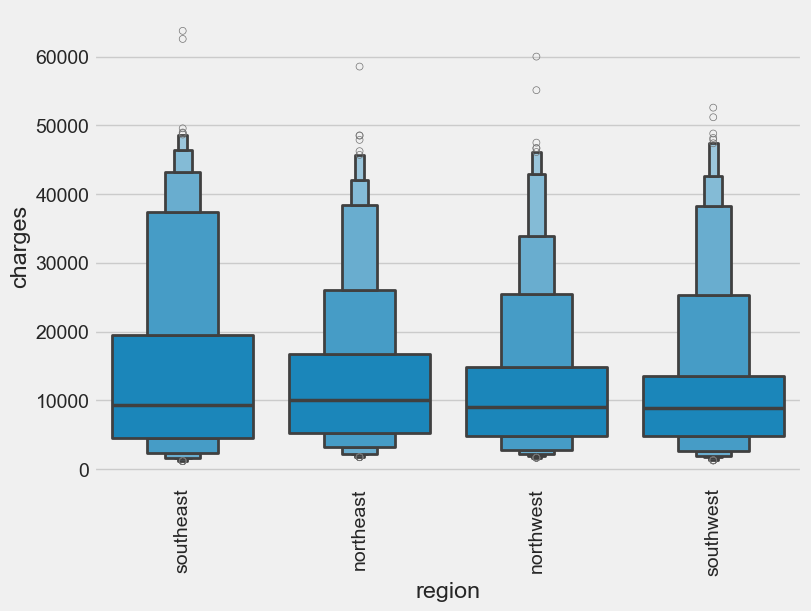

In [146]:
fig = plt.figure(constrained_layout=True,figsize=(8,6))
region = df.groupby(['region'],as_index=False)['charges'].mean().sort_values(by='charges',ascending=False)
a1 = sns.boxenplot(data=df,x='region',y="charges",order=region['region'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);


* In region: southeast has highest average charges and southwest has the lowest, but comparing median northeast is higher than southeast.

#### Fifth Question: Does Smoking have a positive relationship with charges?

In [147]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

* Majorty of people are not smokers.

Text(0.5, 1.0, 'Smoker')

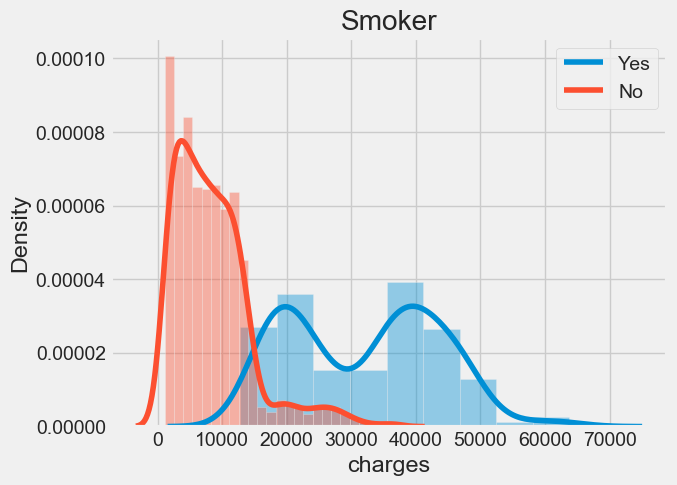

In [148]:
sns.distplot(df[df['smoker']=='yes']['charges'])
sns.distplot(df[df['smoker']=='no']['charges'])
plt.legend('upper right' , labels = ['Yes','No'])
plt.xlabel("charges")
plt.title("Smoker")

Text(0.5, 1.0, 'Smoking')

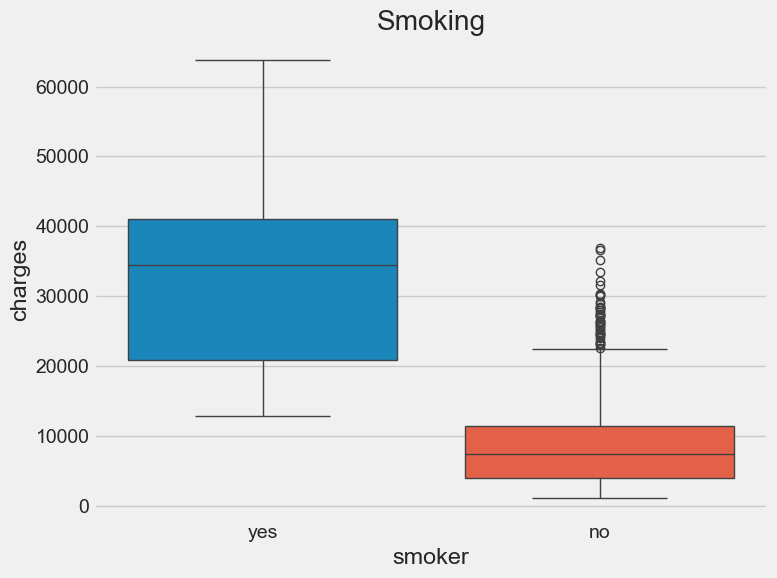

In [149]:
fig = plt.figure(tight_layout=True,figsize=(8,6))
sns.boxplot(data=df,x="smoker",y="charges",hue='smoker')
plt.title("Smoking")

* It's obvious, if you are a smoker your charges will be high, if you are not a smoker your charges will be low. Another good reason to not smoke :)

#### Sixth Question: What is the average charges for males and females?

In [150]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

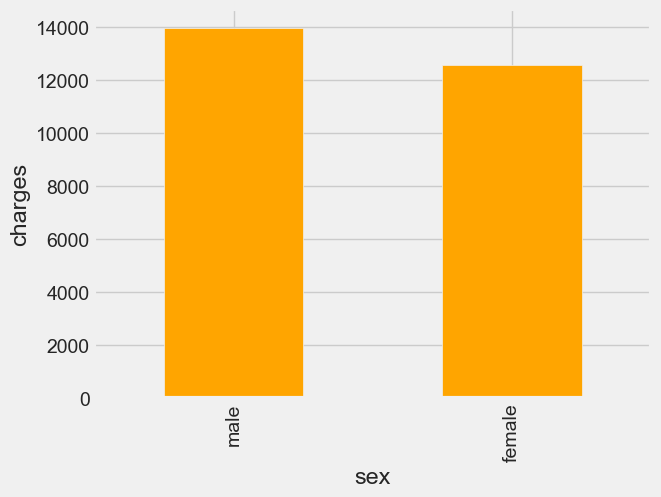

In [151]:
sex_group = df.groupby(["sex"])["charges"].mean().sort_values(ascending=False)
sex_group.plot(kind="bar",color="orange")
plt.ylabel("charges")

plt.show()

Text(0.5, 1.0, 'Sex')

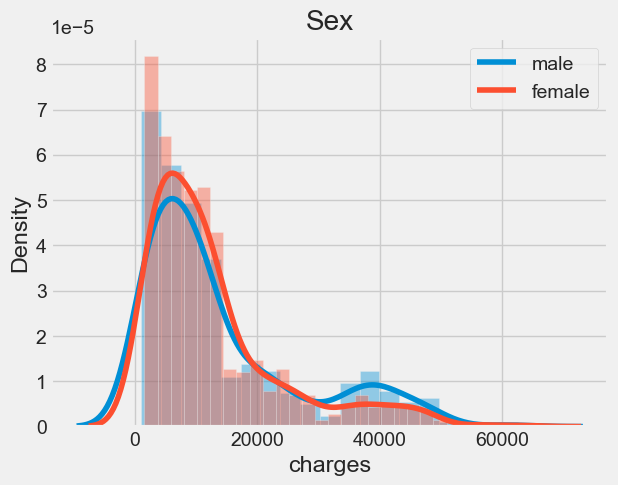

In [152]:
sns.distplot(df[df['sex']=='male']['charges'])
sns.distplot(df[df['sex']=='female']['charges'])
plt.legend('upper right' , labels = ['male','female'])
plt.xlabel("charges")
plt.title("Sex")

<Axes: xlabel='sex', ylabel='charges'>

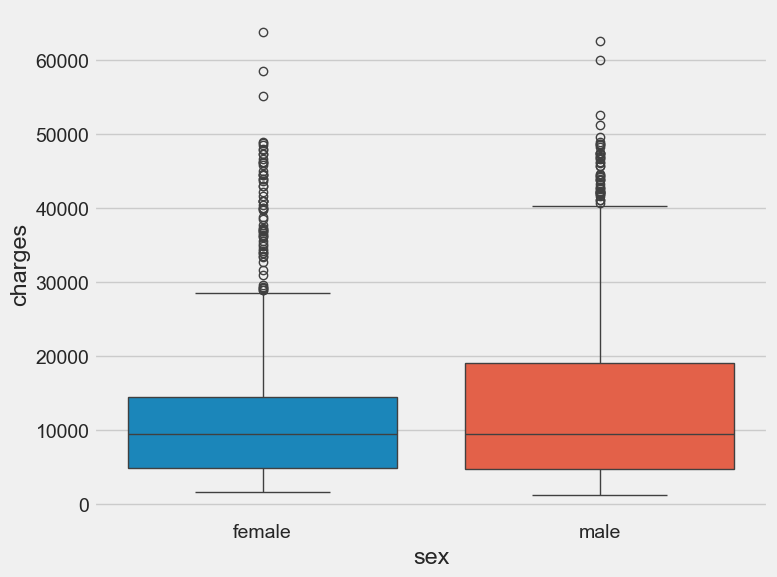

In [153]:
fig = plt.figure(tight_layout=True,figsize=(8,6))
sns.boxplot(data=df,x="sex",y="charges",hue='sex')

* When we compare the average males have higher charges, but when we compare the median males and females have almost same charges, most likely that is because outliers. In general it seems there is no affect of sex on charges.

### That's it we are done with the analysis of all the features.

#### Thank You!